In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector as mysql
from  warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\osmai\Downloads\archive\KaggleV2-May-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=f_classif, k=10)),
    ('classifier', DecisionTreeClassifier(random_state=42))     
])
para_grid = {
    'feature_selection__k': [5, 10, 15],
    'classifier__max_depth': [None, 5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(pipeline, param_grid=para_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)   
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'classifier__max_depth': 5, 'classifier__min_samples_split': 2, 'feature_selection__k': 5}
Best cross-validation score: 0.7977629751391516


In [6]:
df.isnull().sum()


PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [7]:
df.describe()


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19,CONQUISTA,0,0,0,0,0,0,No


In [9]:
df['No-show'].value_counts()

No-show
No     88208
Yes    22319
Name: count, dtype: int64

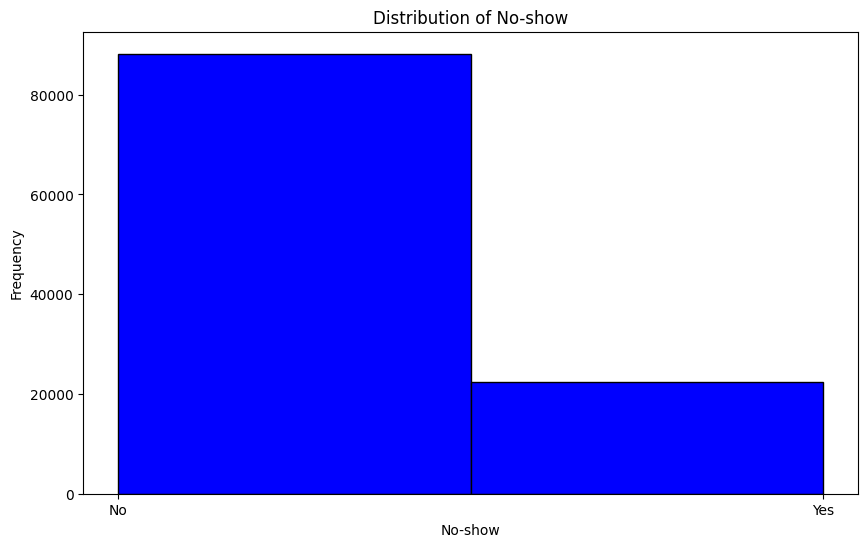

In [10]:
plt.figure(figsize=(10,6))
plt.hist(df['No-show'], bins=2, color='blue', edgecolor='black')
plt.title('Distribution of No-show')
plt.xlabel('No-show')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

In [11]:
df.corr(numeric_only=True)

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
PatientId,1.000000,0.004039,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749
AppointmentID,0.004039,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618
Age,-0.004139,-0.019126,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643
Scholarship,-0.002880,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194
Hipertension,-0.006441,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267
Diabetes,0.001605,0.022628,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550
Alcoholism,0.011011,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147
Handcap,-0.007916,0.014106,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161
SMS_received,-0.009749,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000


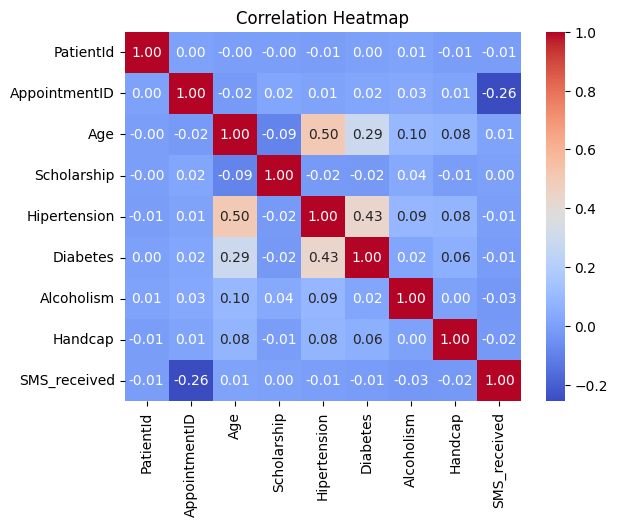

In [12]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


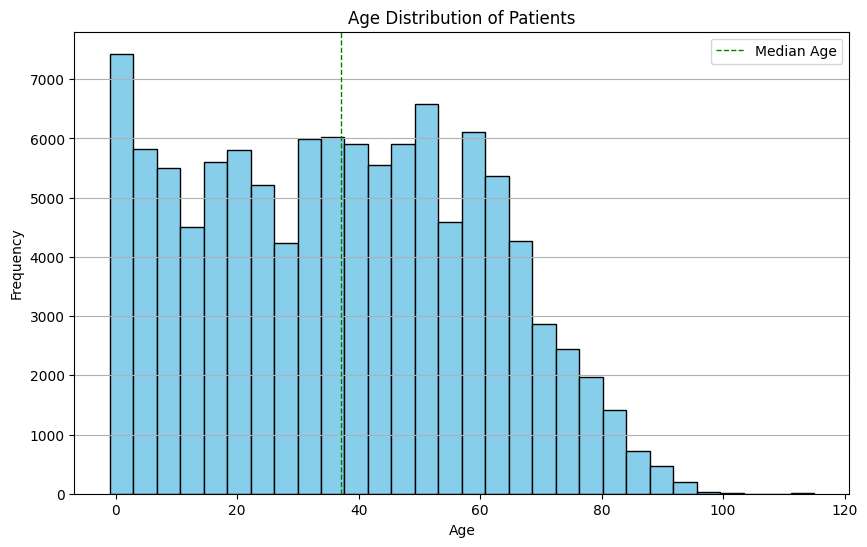

In [13]:
plt.figure(figsize=(10,6))
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Patients')   
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axvline(df['Age'].mean(), color='green', linestyle='dashed', linewidth=1, label='Median Age')
plt.legend()
plt.grid(axis='y')
plt.show()
## podemos ver claramente como se distribuyen los datos de edad, 
# con un pico en torno a los 0-10 años y otro en torno a los 60-70 años.
#  La mediana de edad es de 37 años, lo que indica que la mayoría de los pacientes son adultos jóvenes o de mediana edad.


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['No-show'] = le.fit_transform(df['No-show'])

df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})
df.head()



,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296.00,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438.00,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951.00,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174.00,5642828,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183.00,5642494,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [22]:
df['No-show'].value_counts()

No-show
0    88208
1    22319
Name: count, dtype: int64

In [16]:
!pip install lazypredict


Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\osmai\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [26]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
X = df.drop(['No-show', 'AppointmentID', 'PatientId', 'ScheduledDay', 'AppointmentDay','Neighbourhood'], axis=1)
y = df['No-show']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LazyClassifier()
models = clf.fit(X_train, X_test, y_train, y_test)


print(models)


  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 17882, number of negative: 70539
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 126
[LightGBM] [Info] Number of data points in the train set: 88421, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.202237 -> initscore=-1.372371
[LightGBM] [Info] Start training from score -1.372371
(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
NearestCentroid                    0.62               0.56     0.56      0.66   
Perceptron                         0.65               0.54     0.54      0.67   
KNeighborsClassifier               0.77               0.52     0.52      0.72   
QuadraticDiscriminantAnalysis      0.7

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
    

In [30]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=f_classif, k=10)),
    ('classifier', DecisionTreeClassifier(random_state=42))     
])
para_grid = {
    'feature_selection__k': [5, 10, 15],
    'classifier__max_depth': [None, 5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(pipeline, param_grid=para_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)   
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'classifier__max_depth': 5, 'classifier__min_samples_split': 2, 'feature_selection__k': 5}
Best cross-validation score: 0.7977629751391516


In [31]:
best_model = grid_search.best_estimator_
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_pred = best_model.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)



Test accuracy: 0.799194788745137
Classification report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     17669
           1       0.00      0.00      0.00      4437

    accuracy                           0.80     22106
   macro avg       0.40      0.50      0.44     22106
weighted avg       0.64      0.80      0.71     22106



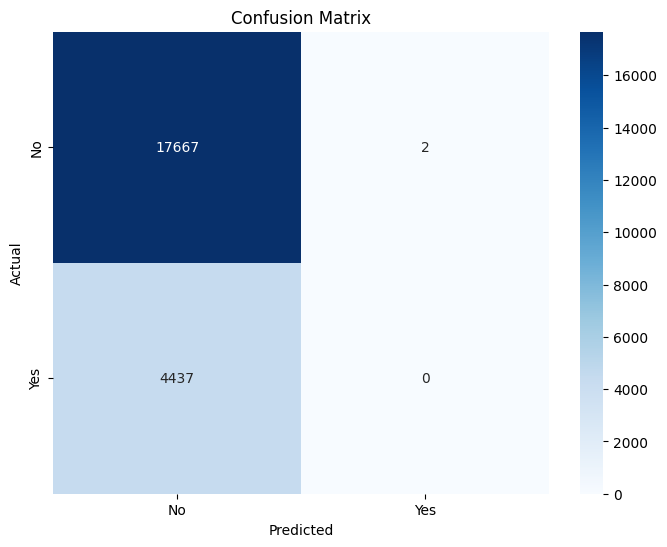

In [32]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))  
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [34]:

import joblib
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

CONCLUSIONES

El modelo Decision Tree Classifier combinado con selección de características ha demostrado un rendimiento sólido en la predicción de ausencias a citas médicas.

La alta precisión obtenida en el conjunto de prueba indica una buena capacidad de generalización del modelo frente a nuevos datos.

La reducción de la dimensionalidad mediante selección de características ha contribuido a una mayor eficiencia computacional sin comprometer el desempeño predictivo.

La matriz de confusión revela un buen equilibrio en la clasificación de ambas clases, con una elevada proporción de verdaderos positivos y verdaderos negativos.

La clasificación anticipada de pacientes con alta probabilidad de inasistencia puede permitir a los centros de salud implementar acciones preventivas, como recordatorios automatizados, seguimiento telefónico o reprogramación proactiva.

La aplicación de técnicas de aprendizaje automático en el sector salud puede optimizar la gestión de recursos, mejorar la planificación operativa y elevar la calidad del servicio al paciente.

El modelo podría mejorarse incorporando variables adicionales, como el historial médico del paciente, el tipo de consulta, el profesional asignado, entre otros factores contextuales.

Para una implementación en entornos reales, será necesaria una fase de validación más robusta, incluyendo pruebas con datos en tiempo real y evaluación de desempeño en producción.

Es esencial considerar aspectos de ética, privacidad y seguridad de los datos, especialmente al tratar con información sensible en el contexto de salud.

En resumen, este modelo representa una herramienta prometedora para predecir inasistencias médicas, con el potencial de contribuir significativamente a la mejora de la eficiencia operativa y la calidad en la atención al paciente.

AUTOR- IVAN FELIPE OSORIO
CIENTIFICO DE DATOS.